### ALL

In [1]:
import pandas as pd
import json
from collections import defaultdict as ddict
from datetime import date
import warnings
warnings.filterwarnings("ignore")

In [2]:
df1 = pd.read_csv('/bad_ip_data/ucsc/Vaccine_Disinfo/data/FULLDF/aug_cluster.csv')
df2 = pd.read_csv('/bad_ip_data/ucsc/Vaccine_Disinfo/data/FULLDF/sep_cluster.csv')

In [3]:
df1.shape

(13668, 20)

In [4]:
df2.shape

(14836, 20)

In [5]:
df = pd.concat([df1,df2])

In [6]:
# df = df2

In [7]:
df.shape

(28504, 20)

In [8]:
df.head(5)

,Unnamed: 0,domain,scanned url,total,positives,duration[VT],rlength,resolution,server,URL after redirects,Final URL,suspicious_tld,length,fake_tld,brand,pop_keywords,similar,is_idn,minus,num_subdomains
0,0,reddit.com,https://www.reddit.com/r/u_rmaccr/comments/ibi...,83,0,0,62335.0,151.101.65.140,snooserv,https://www.reddit.com/user/rmaccr/comments/ib...,https://www.reddit.com/user/rmaccr/comments/ib...,N,188,0,1,0,1,N,0,1
1,1,sputniknews.com,https://fr.sputniknews.com/international/20200...,83,0,0,112305.0,178.248.237.18,QRATOR,None,https://fr.sputniknews.com/international/20200...,N,152,0,0,0,0,N,16,1
2,2,minci.gob.ve,http://www.minci.gob.ve/primer-lote-de-la-vacu...,83,0,0,73169.0,201.249.71.50,Apache/2.4.10 (Debian),None,http://www.minci.gob.ve/primer-lote-de-la-vacu...,N,89,0,0,0,0,N,12,2
3,3,sptnkne.ws,https://sptnkne.ws/Dv3G,83,0,0,87110.0,195.93.247.47,QRATOR,https://tr.sputniknews.com/turkiye/20200817104...,https://tr.sputniknews.com/turkiye/20200817104...,N,105,0,0,0,0,N,6,1
4,4,hispanosaldia.com,http://hispanosaldia.com/2020/08/17/inmunologa...,83,0,0,118769.0,172.67.144.76,cloudflare,None,http://hispanosaldia.com/2020/08/17/inmunologa...,N,117,0,0,0,0,N,11,0


In [9]:
df.columns

Index(['Unnamed: 0', 'domain', 'scanned url', 'total', 'positives',
       'duration[VT]', 'rlength', 'resolution', 'server',
       'URL after redirects', 'Final URL', 'suspicious_tld', 'length',
       'fake_tld', 'brand', 'pop_keywords', 'similar', 'is_idn', 'minus',
       'num_subdomains'],
      dtype='object')

In [10]:
cdf = df[['Final URL', 'total', 'positives','duration[VT]','suspicious_tld', 'length',
       'fake_tld', 'brand', 'pop_keywords', 'similar', 'is_idn', 'minus','num_subdomains']]

In [11]:
cdf

,Final URL,total,positives,duration[VT],suspicious_tld,length,fake_tld,brand,pop_keywords,similar,is_idn,minus,num_subdomains
0,https://www.reddit.com/user/rmaccr/comments/ib...,83,0,0,N,188,0,1,0,1,N,0,1
1,https://fr.sputniknews.com/international/20200...,83,0,0,N,152,0,0,0,0,N,16,1
2,http://www.minci.gob.ve/primer-lote-de-la-vacu...,83,0,0,N,89,0,0,0,0,N,12,2
3,https://tr.sputniknews.com/turkiye/20200817104...,83,0,0,N,105,0,0,0,0,N,6,1
4,http://hispanosaldia.com/2020/08/17/inmunologa...,83,0,0,N,117,0,0,0,0,N,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14831,https://indianexpress.com/article/india/oxford...,83,0,0,N,184,0,0,0,0,N,10,2
14832,https://www.launica945.com/category/meche-cast...,83,0,0,N,61,0,0,0,0,N,4,1
14833,https://mobile.twitter.com/SMadlokovu/status/1...,83,0,0,N,64,0,1,0,1,N,0,1
14834,https://www.cnbc.com/2020/09/10/who-calls-dela...,83,0,0,N,304,0,0,0,1,N,12,2


In [12]:
cdf.dtypes

Final URL         object
total              int64
positives          int64
duration[VT]       int64
suspicious_tld    object
length             int64
fake_tld           int64
brand              int64
pop_keywords       int64
similar            int64
is_idn            object
minus              int64
num_subdomains     int64
dtype: object

In [13]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
cdf['suspicious_tld'] = label_encoder.fit_transform(cdf['suspicious_tld'])
cdf['is_idn'] = label_encoder.fit_transform(cdf['is_idn'])

In [14]:
cdf

,Final URL,total,positives,duration[VT],suspicious_tld,length,fake_tld,brand,pop_keywords,similar,is_idn,minus,num_subdomains
0,https://www.reddit.com/user/rmaccr/comments/ib...,83,0,0,0,188,0,1,0,1,0,0,1
1,https://fr.sputniknews.com/international/20200...,83,0,0,0,152,0,0,0,0,0,16,1
2,http://www.minci.gob.ve/primer-lote-de-la-vacu...,83,0,0,0,89,0,0,0,0,0,12,2
3,https://tr.sputniknews.com/turkiye/20200817104...,83,0,0,0,105,0,0,0,0,0,6,1
4,http://hispanosaldia.com/2020/08/17/inmunologa...,83,0,0,0,117,0,0,0,0,0,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14831,https://indianexpress.com/article/india/oxford...,83,0,0,0,184,0,0,0,0,0,10,2
14832,https://www.launica945.com/category/meche-cast...,83,0,0,0,61,0,0,0,0,0,4,1
14833,https://mobile.twitter.com/SMadlokovu/status/1...,83,0,0,0,64,0,1,0,1,0,0,1
14834,https://www.cnbc.com/2020/09/10/who-calls-dela...,83,0,0,0,304,0,0,0,1,0,12,2


In [15]:
#Normalize columns of pandas data frame
cdf = cdf.iloc[:,1:].apply(lambda x: x/x.max(), axis=0)

In [16]:
cdf

,total,positives,duration[VT],suspicious_tld,length,fake_tld,brand,pop_keywords,similar,is_idn,minus,num_subdomains
0,1.0,0.0,0.0,0.0,0.204793,0.0,1.0,0.0,0.5,0.0,0.000000,0.0625
1,1.0,0.0,0.0,0.0,0.165577,0.0,0.0,0.0,0.0,0.0,0.250000,0.0625
2,1.0,0.0,0.0,0.0,0.096950,0.0,0.0,0.0,0.0,0.0,0.187500,0.1250
3,1.0,0.0,0.0,0.0,0.114379,0.0,0.0,0.0,0.0,0.0,0.093750,0.0625
4,1.0,0.0,0.0,0.0,0.127451,0.0,0.0,0.0,0.0,0.0,0.171875,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
14831,1.0,0.0,0.0,0.0,0.200436,0.0,0.0,0.0,0.0,0.0,0.156250,0.1250
14832,1.0,0.0,0.0,0.0,0.066449,0.0,0.0,0.0,0.0,0.0,0.062500,0.0625
14833,1.0,0.0,0.0,0.0,0.069717,0.0,1.0,0.0,0.5,0.0,0.000000,0.0625
14834,1.0,0.0,0.0,0.0,0.331155,0.0,0.0,0.0,0.5,0.0,0.187500,0.1250


In [17]:
cdf.isnull().sum()

total             0
positives         0
duration[VT]      0
suspicious_tld    0
length            0
fake_tld          0
brand             0
pop_keywords      0
similar           0
is_idn            0
minus             0
num_subdomains    0
dtype: int64

### T_SNE

In [18]:
# # from sklearn.manifold import TSNE
# from sklearn.decomposition import PCA

# X_embedded = PCA(n_components=2).fit_transform(cdf)

# X_embedded = pd.DataFrame(list(map(lambda x:{'x':x[0][0],'y':x[0][1],'positives':x[1]},zip(X_embedded,list(df['positives'])))))

# from matplotlib import pyplot as plt
# import seaborn as sns
# sns.set_style("whitegrid")
# fig = plt.figure(figsize=(10,8))
# sns.scatterplot(data=X_embedded,x='x',y='y',hue='positives')
# # plt.plot(X_embedded)
# plt.show()

In [24]:
cdf.loc[cdf.positives>0]

,total,positives,duration[VT],suspicious_tld,length,fake_tld,brand,pop_keywords,similar,is_idn,minus,num_subdomains
171,1.0,0.333333,0.000000,0.0,0.057734,0.0,1.0,0.0,0.5,0.0,0.015625,0.0625
220,1.0,0.166667,0.000000,0.0,0.075163,0.0,0.0,0.0,0.5,0.0,0.000000,0.0625
348,1.0,0.166667,0.000000,0.0,0.104575,0.0,0.0,0.0,0.0,0.0,0.140625,0.0000
481,1.0,0.333333,0.000000,0.0,0.127451,0.0,0.0,0.0,0.0,0.0,0.187500,0.0000
524,1.0,0.166667,0.000000,0.0,0.141612,0.0,0.0,0.0,0.0,0.0,0.203125,0.0625
...,...,...,...,...,...,...,...,...,...,...,...,...
14592,1.0,0.333333,0.000000,0.0,0.112200,0.0,0.0,0.0,0.0,0.0,0.187500,0.0625
14658,1.0,0.500000,0.000000,0.0,0.020697,0.0,0.0,0.0,0.0,0.0,0.000000,0.0000
14663,1.0,0.166667,0.000000,0.0,0.149237,0.0,0.0,0.0,0.0,0.0,0.171875,0.0625
14702,1.0,0.166667,0.025395,0.0,0.142702,0.0,0.0,0.0,0.0,0.0,0.171875,0.0625


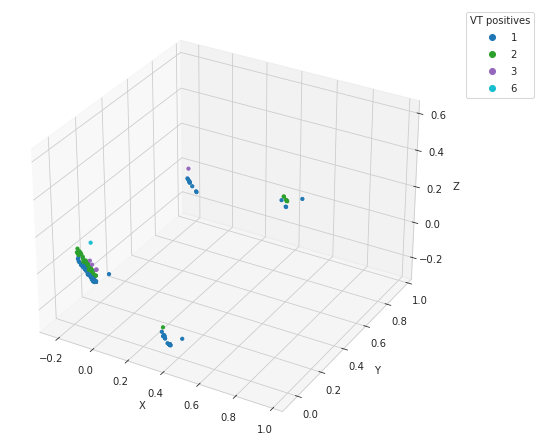

In [54]:
import numpy as np
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")


from sklearn.manifold import TSNE

X_embedded = PCA(n_components=3).fit_transform(cdf.loc[cdf.positives>0])
# X_embedded = TSNE(n_components=3,perplexity=50).fit_transform(cdf.loc[cdf.positives>0])
X_embedded = pd.DataFrame(list(map(lambda x:{'x':x[0][0],'y':x[0][1],'z':x[0][2],'positives':x[1]},zip(X_embedded,list(df.loc[df.positives>0]['positives'])))))

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# axes instance
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("tab10").as_hex())

# plot
sc = ax.scatter(X_embedded.x, X_embedded.y, X_embedded.z, s=40, c=X_embedded.positives, marker='.', cmap=cmap, alpha=1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2,title="VT positives")
plt.show()

In [56]:
from collections import Counter
from collections import defaultdict as ddict
def viewServer():
    DATA = ddict(list)
    for key,val in Counter(df.loc[df.positives>0].server).items():
        DATA['Server'].append(key)
        DATA['Count'].append(val)
        DATA['percentage from dataset'].append('{}%'.format(int(val)/len(df.loc[df.positives].server)*100))
    return pd.DataFrame(DATA)

In [57]:
DATA = viewServer()

In [58]:
DATA.sort_values(by='Count', ascending=False)

,Server,Count,percentage from dataset
5,nginx,96,0.16839741790625876%
1,NaN,87,0.152610159977547%
3,cloudflare,83,0.14559360089811957%
4,Apache,55,0.09647768734212742%
15,openresty,18,0.03157451585742352%
14,LiteSpeed,13,0.02280381700813921%
0,Server,7,0.012278978388998035%
17,Sucuri/Cloudproxy,7,0.012278978388998035%
7,Apache-Coyote/1.1,6,0.010524838619141172%
8,nginx/1.15.8,6,0.010524838619141172%
